# Análisis HRV y HRT

## Datos en formato DATAFRAME

El primer paso es la lectura de los datos y la conversión en un dataframe de PANDAS

In [1]:
#read data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#X_data = np.load(r'C:\Users\Margaft\señal Rebeca\PyCardio-master\X_matrix.npy')
X_data = np.load('X_matrix.npy')

#no borres esta línea de arriba, te he añadido la línea para que puedas llamar desde tu ordenador a los datos
#y vamos comentando y descomentando.

#X_data = np.load(r'C:\Users\Margaft\señal Rebeca\PyCardio-master\X_matrix.npy')

#labels: id, name, Ptot, Pulf, Pvlf, Plf, Phf, lfhf_ratio, scl, ci, cp, to, ts, to_average, ts_average 

labels = ['id', 'name', 'Ptot', 'Pulf', 'Pvlf', 'Plf', 'Phf', 'lfhf_ratio', 'scl', 'ci', 'cp', 'to', 'ts', 'to_average', 'ts_average']
    
#convert into pandas

df = pd.DataFrame(data = X_data,columns = labels)

#change datatypes

df[labels[2:]] = df[labels[2:]].apply(pd.to_numeric)


Mostramos las 5 primeras filas del dataframe.

In [2]:
df.head()

,id,name,Ptot,Pulf,Pvlf,Plf,Phf,lfhf_ratio,scl,ci,cp,to,ts,to_average,ts_average
0,1,MU_ES_PANDA_HOLTERALTA,1146.746674,0.0,372.167222,329.514015,445.065438,0.740372,1045.0,670.0,1425.0,-1.418440,7.0,-3.488372,15.250000
1,1,MU_ES_PANDA_HOLTERALTA,1390.984932,0.0,486.596715,434.261708,470.126509,0.923712,1078.0,575.0,1545.0,-5.491991,24.5,-3.488372,15.250000
2,2,MO_GA_PANDA_HOLTERALTA,1406.653670,0.0,884.931026,441.773174,79.949470,5.525655,766.0,485.0,1020.0,-0.653595,3.0,-0.653595,3.000000
3,3,AL_MA_PANDA_HOLTERALTA,329.135673,0.0,220.803095,84.774475,23.558104,3.598527,877.0,665.0,1100.0,-0.571429,5.5,-1.334365,3.306452
4,3,AL_MA_PANDA_HOLTERALTA,488.136692,0.0,327.904546,60.713874,99.518272,0.610078,925.0,540.0,1325.0,-2.179837,10.0,-1.334365,3.306452


Obtenemos un resumen del dataframe. Una de las cosas que podemos apreciar es que tenemos 1095 datos.

In [3]:
df.describe()

,Ptot,Pulf,Pvlf,Plf,Phf,lfhf_ratio,scl,ci,cp,to,ts,to_average,ts_average
count,1095.000000,1095.0,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,600.807910,0.0,328.301379,159.856204,112.650326,1.984460,806.200913,515.132420,1076.757991,-0.015463,5.922374,-0.047601,2.237174e+00
std,986.942581,0.0,626.616469,353.034813,203.313288,1.974418,193.464039,114.789394,262.045011,2.824430,7.409780,1.494994,4.258512e+00
min,15.463122,0.0,3.748211,2.241270,2.119333,0.067457,552.000000,350.000000,685.000000,-16.009852,-3.000000,-6.822612,7.334873e-14
25%,103.811240,0.0,35.102940,27.636129,20.693718,0.761669,631.000000,420.000000,837.500000,-0.868396,1.500000,0.015795,2.766180e-01
50%,236.795263,0.0,89.307800,64.009206,50.895632,1.305077,760.000000,470.000000,1045.000000,0.318471,3.500000,0.015795,1.211073e+00
75%,668.431868,0.0,342.545656,162.910956,120.291436,2.457399,958.000000,605.000000,1270.000000,1.147232,7.500000,0.742791,1.701031e+00
max,12361.876350,0.0,7416.877746,8322.833396,2418.907230,16.360677,1693.000000,915.000000,2130.000000,18.032787,65.000000,5.494505,2.340909e+01


### Estructura de la matriz

Vamos a entender la estructura de la matriz de datos. Cada fila de la matriz corresponde la ocurrencia de un VPC-tachogram dentro de un Holter de 24 horas. Como estamos estudiando los VPC-tachogram aislados, podemos tener más de un VPC-tachogram que pertenezca al mismo paciente.

Las columnas representan las características de cada VPC-tachogram individual:
 * *id* **Identificador de paciente**. Cada paciente en la base de datos tiene un identificador numérico. 
 * *name* **Identificador de paciente - nombre**. Este es un identificador de paciente con iniciales. Lo vamos a eliminar por seguridad.
 * *Ptot* Potencia total de las señal de intervalos RR en los 3 minutos previos. Mide la potencia de la señal de variabilidad.
 * *Pulf* Potencia en la banda de *ultra low frequency*. Esta banda no tiene sentido en 3 minutos.
 * *Pvlf* Potencia en la banda de *very low frequency*.
 * *Plf* Potencia en la banda de *low frequency*.
 * *Phf* Potencia en la banda de *high frequency*.
 * *lfhf_ratio* Ratio de potencias lf/hf
 * *scl* **Sinus cardiac length** corresponde al promedio de los 3 intervalos RR previos al VPC. Mide el ritmo cardiaco al que se encuentra el paciente cuando se produce el VPC.
 * *ci* **Coupling interval** corresponde al intervalo RR del latido VPC.
 * *cp* **Compensatory Pause** corresponde a la pausa compensatoria, esto es, el intervalo RR justo des pués del VPC.
 * *to* **Turbulence Onset** corresponde al parámetro TO, calculado sobre el VPC-tachogram individual en cuestión.
 * *ts* **Turbulence Slope** corresponde al parámetro TS, calculado sobre el VPC-tachogram individual en cuestión.
 * *to_average* **Turbulence Onset** corresponde al parámetro TO, calculado sobre el VPC-tachogram promedio para el paciente. Debe ser igual para todos las filas de la matriz que correspondan a un mismo paciente.
 * *ts_average* **Turbulence Slope** corresponde al parámetro TS, calculado sobre el VPC-tachogram promedio para el paciente. Debe ser igual para todos las filas de la matriz que correspondan a un mismo paciente.

In [4]:
#remove name col

df.drop(labels = ['name'],axis = 1,inplace = True)

In [5]:
df.describe()

,Ptot,Pulf,Pvlf,Plf,Phf,lfhf_ratio,scl,ci,cp,to,ts,to_average,ts_average
count,1095.000000,1095.0,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,600.807910,0.0,328.301379,159.856204,112.650326,1.984460,806.200913,515.132420,1076.757991,-0.015463,5.922374,-0.047601,2.237174e+00
std,986.942581,0.0,626.616469,353.034813,203.313288,1.974418,193.464039,114.789394,262.045011,2.824430,7.409780,1.494994,4.258512e+00
min,15.463122,0.0,3.748211,2.241270,2.119333,0.067457,552.000000,350.000000,685.000000,-16.009852,-3.000000,-6.822612,7.334873e-14
25%,103.811240,0.0,35.102940,27.636129,20.693718,0.761669,631.000000,420.000000,837.500000,-0.868396,1.500000,0.015795,2.766180e-01
50%,236.795263,0.0,89.307800,64.009206,50.895632,1.305077,760.000000,470.000000,1045.000000,0.318471,3.500000,0.015795,1.211073e+00
75%,668.431868,0.0,342.545656,162.910956,120.291436,2.457399,958.000000,605.000000,1270.000000,1.147232,7.500000,0.742791,1.701031e+00
max,12361.876350,0.0,7416.877746,8322.833396,2418.907230,16.360677,1693.000000,915.000000,2130.000000,18.032787,65.000000,5.494505,2.340909e+01


## Análisis exploratorio de cada una de las variables

En primer lugar vamos a realizar un pequeño análisis de cada una de las variables por separado. De esta forma, tendremos una idea de cuál es la distribución de valores de los diferentes parámetros.

#### Distribución de Ptot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ba2e8d0>]], dtype=object)

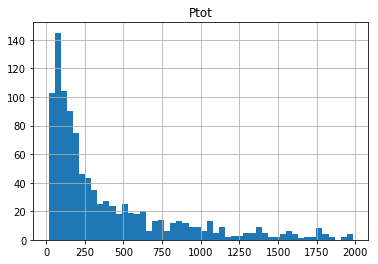

In [6]:
#Pintamos el histograma

df[df['Ptot']<2000].hist(column = 'Ptot', bins = 50)

#### Distribución de Pvlf


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1136a2750>]], dtype=object)

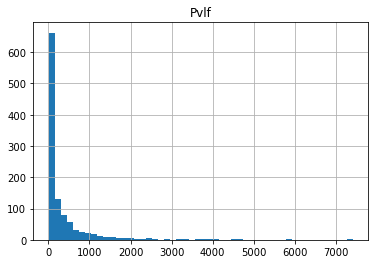

In [7]:
df.hist(column = 'Pvlf',bins = 50)

## TO DO

Repetir los gráficos para cada una de las variables. Hacer algún comentario sobre cada una de ellas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107886d50>]], dtype=object)

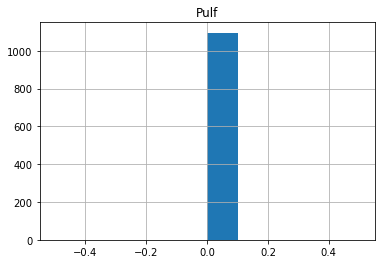

In [8]:
df.hist(column = 'Pulf')

Aquí hay que notar que todos los valores son 0. Esto tiene sentido, pues es banda carece de esentido en un segemento de intervalos RR de duración 3 minutos.

#### Potencia en banda LF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1173503d0>]], dtype=object)

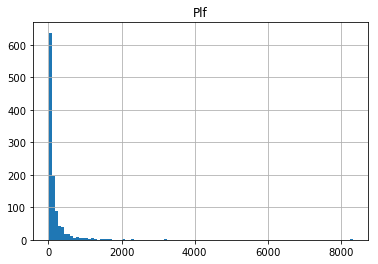

In [9]:
df.hist(column = 'Plf',bins =100)

#### Potencia en banda HF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1171a93d0>]], dtype=object)

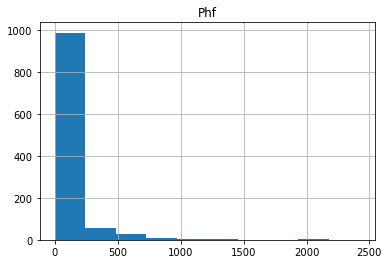

In [10]:
df.hist(column = 'Phf')

#### Ratio LF/HF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117869490>]], dtype=object)

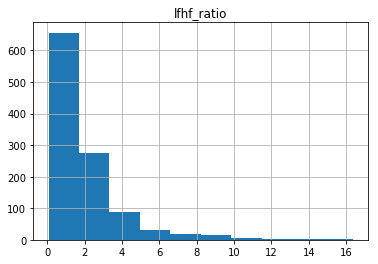

In [11]:
df.hist(column = 'lfhf_ratio')

#### SCL antes del VPC

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1179f2dd0>]], dtype=object)

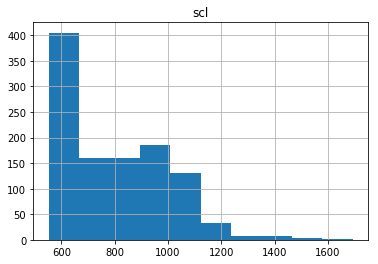

In [12]:
df.hist(column = 'scl')

#### Copuling Interval del VPC

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c3c890>]], dtype=object)

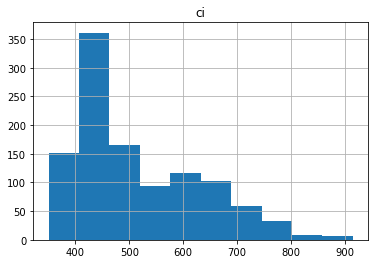

In [13]:
df.hist(column = 'ci')

#### Pause Compentasory after VPC

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117dd1b10>]], dtype=object)

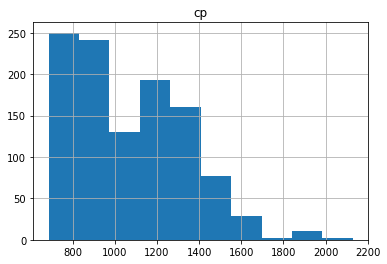

In [14]:
df.hist(column = 'cp')

#### TS and TO for isolated VPC-tchograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1180e1ed0>]], dtype=object)

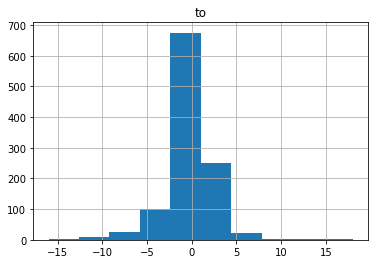

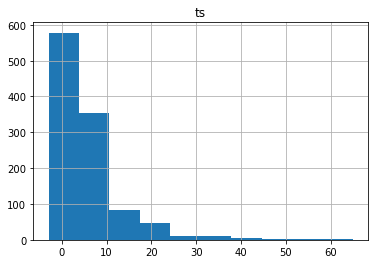

In [15]:
df.hist(column = 'to')
df.hist(column = 'ts')

#### Average TS and TO, per patient

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183dd810>]], dtype=object)

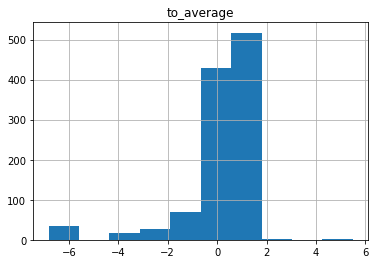

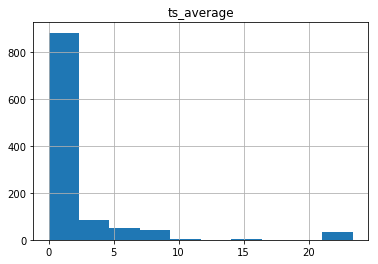

In [16]:
df.hist(column = 'to_average')
df.hist(column = 'ts_average')

### REFLEXIONES SOBRE LOS HISTOGRAMAS

Hay una cosa que me ha llamado mucho la atención al ver los histogramas. Tiene que ver con el hecho de que no se ve casi nada en los histogramas de las potencias. Da la impresión de que tenemos un montón de muestras con un valor muy pequeño, y muy pocas con valores muy grandes. Esto hace que la pinta de los histogramas sea como exponencial. 

Me gustaría comprobar si esto se soluciona aplicando una transformación logarítmica a estos valores. Aquí vamos a tenes problemas con los valores que sean 0. Por eso, descartamos ya la variable PUlf. En las restantes no debería haber valores de 0, salvo error. Vamos a representar lo que ocurre cuando transofrmamos. Esto debería resultar en un histograma más "gaussiano". Esto nos va a permitir luego entender mejor los resultados. 

Realizo yo la transformación para una de las variables, haz el resto. **Ojo: sólo para las de la potencia (excepto ulf)**.

#### Transformación logarítmica de variables de potencia: Plf

In [17]:
#con este comando se aplica la función np.log a la variable Plf y la guardamos en una nueva variable con el nombre Plf_log

df['Plf_log'] = df['Plf'].apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11827d650>]], dtype=object)

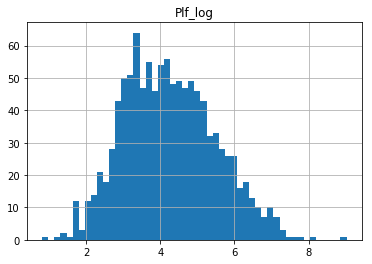

In [18]:
df.hist(column='Plf_log',bins = 50)

**Transformación logarítmica de variables de potencia: Ptot**

In [19]:
df['Ptot_log'] = df['Ptot'].apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118701190>]], dtype=object)

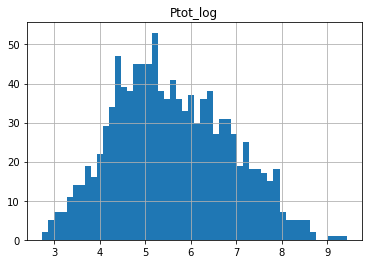

In [20]:
df.hist(column='Ptot_log',bins = 50)

**Transformación logarítmica de variables de potencia: Pvlf**

In [21]:
df['Pvlf_log'] = df['Pvlf'].apply(np.log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118a7c510>]], dtype=object)

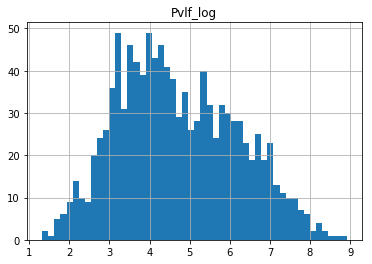

In [22]:
df.hist(column='Pvlf_log',bins = 50)

**Transformación logarítmica de variables de potencia: Plf**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118834850>]], dtype=object)

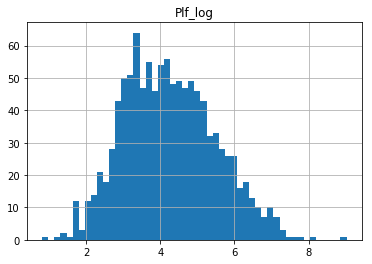

In [23]:
df['Plf_log'] = df['Plf'].apply(np.log)
df.hist(column='Plf_log',bins = 50)

**Transformación logarítmica de variables de potencia: Phf**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118ca1350>]], dtype=object)

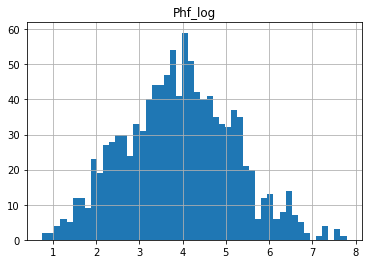

In [24]:
df['Phf_log'] = df['Phf'].apply(np.log)
df.hist(column='Phf_log',bins = 50)

**Transformación logarítmica de variables de potencia: lfhf_ratio**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118ef5390>]], dtype=object)

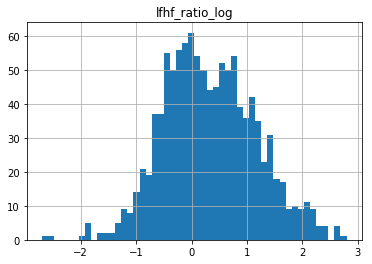

In [25]:
df['lfhf_ratio_log'] = df['lfhf_ratio'].apply(np.log)
df.hist(column='lfhf_ratio_log',bins = 50)

## TO DO: realizar las transformaciones de las variables y representar

In [26]:
#creamos la variable low_risk, que será 1 si el VPC-tachogram pertenece a un pat de low risk
# será 0 si pertenece a uno de high risk y será NaN si no pertenece ni a uno ni a otro
df['low_risk'] = np.NaN

print(np.sum(df['low_risk'].isna()))

df.head()

#asiganmos 1 a los VPC-tachograms de pats que cumplan ts_a >2.5 & to_a < 0

#df.loc[(df['ts_average']>2.5) & (df['to_average']<0),'low_risk'] = 1
df.loc[(df['ts_average']>2.5) & (df['to_average']<0),'low_risk'] = 'Low risk'

#asiganmos 0 a los VPC-tachograms de pats que cumplan ts_a <2.5 & to_a > 0
#df.loc[(df['ts_average']<2.5) & (df['to_average']>0),'low_risk'] = 0
df.loc[(df['ts_average']<2.5) & (df['to_average']>0),'low_risk'] = 'High risk'


print(np.sum(df['low_risk'].isna()))

df.head()

1095
135


,id,Ptot,Pulf,Pvlf,Plf,Phf,lfhf_ratio,scl,ci,cp,to,ts,to_average,ts_average,Plf_log,Ptot_log,Pvlf_log,Phf_log,lfhf_ratio_log,low_risk
0,1,1146.746674,0.0,372.167222,329.514015,445.065438,0.740372,1045.0,670.0,1425.0,-1.418440,7.0,-3.488372,15.250000,5.797619,7.044684,5.919343,6.098221,-0.300602,Low risk
1,1,1390.984932,0.0,486.596715,434.261708,470.126509,0.923712,1078.0,575.0,1545.0,-5.491991,24.5,-3.488372,15.250000,6.073647,7.237767,6.187436,6.153002,-0.079354,Low risk
2,2,1406.653670,0.0,884.931026,441.773174,79.949470,5.525655,766.0,485.0,1020.0,-0.653595,3.0,-0.653595,3.000000,6.090797,7.248969,6.785510,4.381395,1.709402,Low risk
3,3,329.135673,0.0,220.803095,84.774475,23.558104,3.598527,877.0,665.0,1100.0,-0.571429,5.5,-1.334365,3.306452,4.439994,5.796470,5.397271,3.159470,1.280525,Low risk
4,3,488.136692,0.0,327.904546,60.713874,99.518272,0.610078,925.0,540.0,1325.0,-2.179837,10.0,-1.334365,3.306452,4.106172,6.190595,5.792723,4.600341,-0.494169,Low risk


## TO_DO: boxplots de todas las variables (con log y sin log). Menos Pulf (descartada ya) y to y ts.

A partir de ahora $to$ y $ts$ van a ser nuestras variables respuesta, por lo que vamos a intentar relacionar todas las otras variables con estas. 

### Comparación con Boxplots
Vamos a realizar una representación de boxplot. Hecha un vistazo a lo que son los boxplots en la wikipedia [boxplot](https://en.wikipedia.org/wiki/Box_plot). Esto nos va a permitir verificar si existe alguna diferencia entre los valores de HRV, medidos con índices espectrales para los pacientes de alto riesgo vs. los de bajo riesgo. Es una representación muy parecida a la que tu has planteado, pero es más compacta, nos permite ver de un vistazo, y en la misma gráfica, la comparación entre las distribuciones.

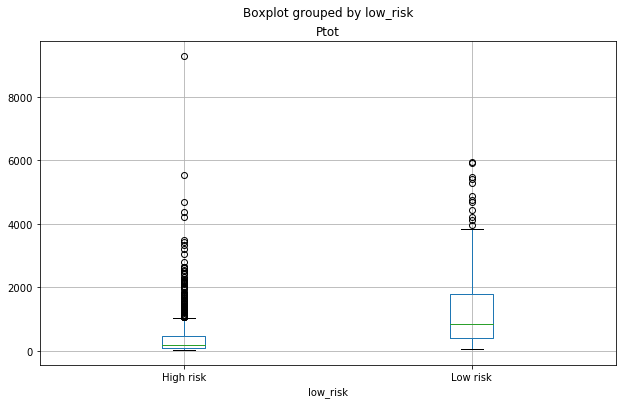

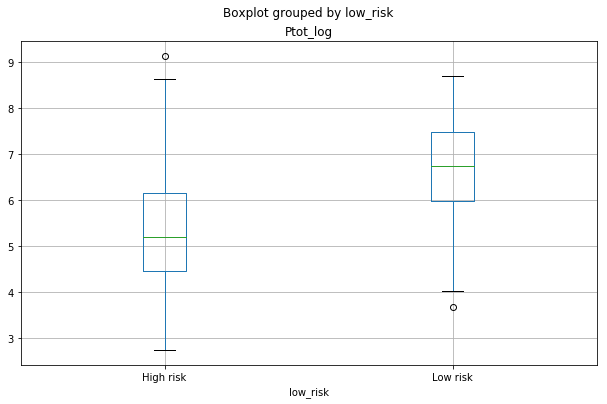

In [27]:
#boxplot for Ptot, and the corresponding log

df.boxplot('Ptot',by='low_risk',figsize = (10,6))
df.boxplot('Ptot_log',by='low_risk',figsize = (10,6))


## Reflexiones sobre los resultados con este primer boxplot

Una cosa que podemos ver es que, cuando no representamos los valores con la transformación logarítmica, la mayoría de los valores los muestra como si fuesen *outliers*. Sin embargo, cuando se realiza la transformación, se puede observar, que al ser la distribución de los valores, "más gaussiana", se pueden analizar las diferencias más sencillamente. 

Yo destacaría que los valores de Ptot, para los pacientes de bajo resgo (1.0, luego podemos cambiar esto en el dataframe, para que aparezcan labels mejor pintados), poseen una Potencia total mayor. Quizá indicando que la HRV es mayor.

Como puedes ver este análisis es más sencillo de realizar cuando utilizamos boxplots.

In [28]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de la Ptot correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'Ptot', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Ptot', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Ptot', bins = 50)

#Dibujamos el histograma  de la Ptot_log correspondiente a los tacogramas de bajo riesgo
df2= df[df['low_risk'] == 1]
df2.hist(column = 'Ptot_log', bins = 50)

#Dibujamos el histograma  de la Ptot_log correspondiente a los tacogramas de alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Ptot_log', bins = 50)

#Histograma Ptot_log para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Ptot_log', bins = 50)
"""

"#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1\ndf2 = df[df['low_risk'] == 1]\n\n#Dibujamos el histograma  de la Ptot correspondiente a los tacogramas de bajo riesgo\ndf2.hist(column = 'Ptot', bins = 50)\n\n#Realizamos lo mismo pero para los correspondientes a alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Ptot', bins = 50)\n\n#Histograma para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Ptot', bins = 50)\n\n#Dibujamos el histograma  de la Ptot_log correspondiente a los tacogramas de bajo riesgo\ndf2= df[df['low_risk'] == 1]\ndf2.hist(column = 'Ptot_log', bins = 50)\n\n#Dibujamos el histograma  de la Ptot_log correspondiente a los tacogramas de alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Ptot_log', bins = 50)\n\n#Histograma Ptot_log para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Ptot_log', bins = 50

### Pvlf

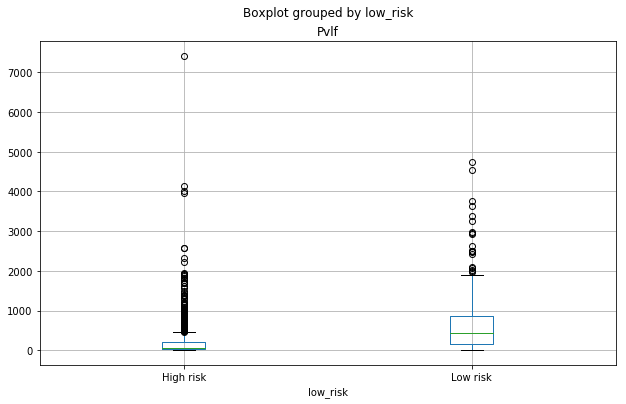

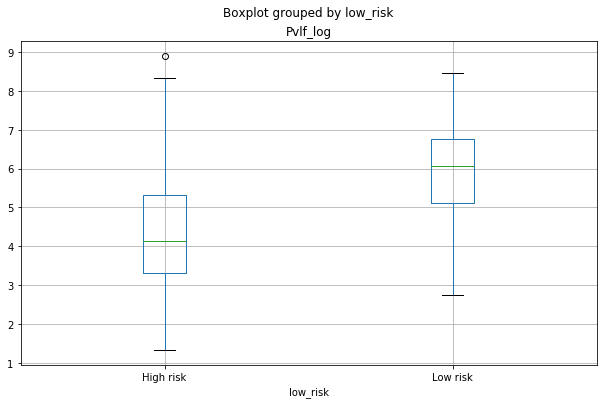

In [29]:
#boxplot for Pvlf, and the corresponding log

df.boxplot('Pvlf',by='low_risk',figsize = (10,6))
df.boxplot('Pvlf_log',by='low_risk',figsize = (10,6))

**Representación Pvlf y Pvlf_log de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

In [30]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de la Pvlf correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'Pvlf', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Pvlf', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Pvlf', bins = 50)

#Dibujamos el histograma  de la Pvlf_log correspondiente a los tacogramas de bajo riesgo
df2= df[df['low_risk'] == 1]
df2.hist(column = 'Pvlf_log', bins = 50)

#Dibujamos el histograma  de la Pvlf_log correspondiente a los tacogramas de alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Pvlf_log', bins = 50)

#Histograma Pvlf_log para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Pvlf_log', bins = 50)
"""

"#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1\ndf2 = df[df['low_risk'] == 1]\n\n#Dibujamos el histograma  de la Pvlf correspondiente a los tacogramas de bajo riesgo\ndf2.hist(column = 'Pvlf', bins = 50)\n\n#Realizamos lo mismo pero para los correspondientes a alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Pvlf', bins = 50)\n\n#Histograma para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Pvlf', bins = 50)\n\n#Dibujamos el histograma  de la Pvlf_log correspondiente a los tacogramas de bajo riesgo\ndf2= df[df['low_risk'] == 1]\ndf2.hist(column = 'Pvlf_log', bins = 50)\n\n#Dibujamos el histograma  de la Pvlf_log correspondiente a los tacogramas de alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Pvlf_log', bins = 50)\n\n#Histograma Pvlf_log para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Pvlf_log', bins = 50

**Representación Plf y Plf_log de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

In [31]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de la Plf correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'Plf', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Plf', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Plf', bins = 50)

#Dibujamos el histograma  de la Plf_log correspondiente a los tacogramas de bajo riesgo
df2= df[df['low_risk'] == 1]
df2.hist(column = 'Plf_log', bins = 50)

#Dibujamos el histograma  de la Plf_log correspondiente a los tacogramas de alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Plf_log', bins = 50)

#Histograma Plf_log para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Plf_log', bins = 50)
"""

"#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1\ndf2 = df[df['low_risk'] == 1]\n\n#Dibujamos el histograma  de la Plf correspondiente a los tacogramas de bajo riesgo\ndf2.hist(column = 'Plf', bins = 50)\n\n#Realizamos lo mismo pero para los correspondientes a alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Plf', bins = 50)\n\n#Histograma para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Plf', bins = 50)\n\n#Dibujamos el histograma  de la Plf_log correspondiente a los tacogramas de bajo riesgo\ndf2= df[df['low_risk'] == 1]\ndf2.hist(column = 'Plf_log', bins = 50)\n\n#Dibujamos el histograma  de la Plf_log correspondiente a los tacogramas de alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Plf_log', bins = 50)\n\n#Histograma Plf_log para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Plf_log', bins = 50)\n"

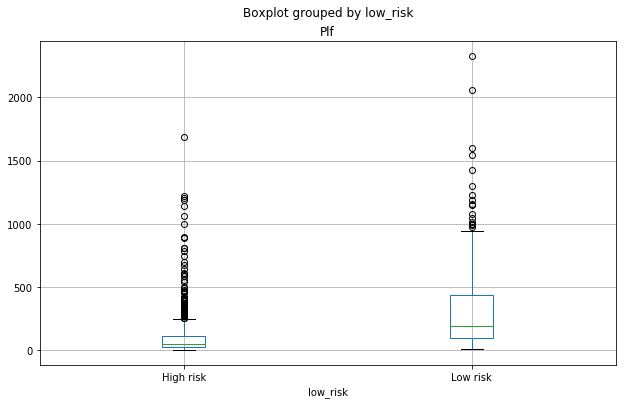

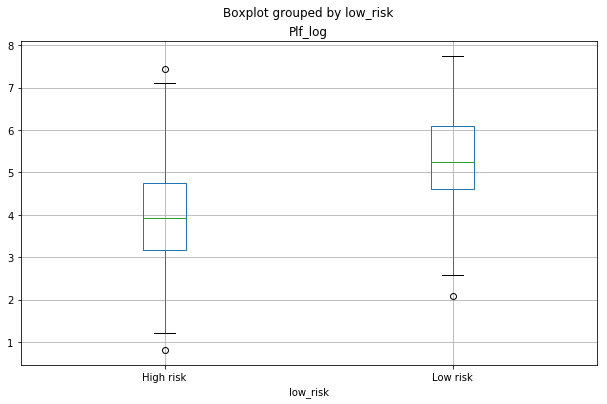

In [32]:
#boxplot for Plf, and the corresponding log

df.boxplot('Plf',by='low_risk',figsize = (10,6))
df.boxplot('Plf_log',by='low_risk',figsize = (10,6))

**Representación Phf y Phf_log de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

In [33]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de la Phf correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'Phf', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Phf', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Phf', bins = 50)

#Dibujamos el histograma  de la Phf_log correspondiente a los tacogramas de bajo riesgo
df2= df[df['low_risk'] == 1]
df2.hist(column = 'Phf_log', bins = 50)

#Dibujamos el histograma  de la Phf_log correspondiente a los tacogramas de alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'Phf_log', bins = 50)

#Histograma Phf_log para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'Phf_log', bins = 50)
"""

"#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1\ndf2 = df[df['low_risk'] == 1]\n\n#Dibujamos el histograma  de la Phf correspondiente a los tacogramas de bajo riesgo\ndf2.hist(column = 'Phf', bins = 50)\n\n#Realizamos lo mismo pero para los correspondientes a alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Phf', bins = 50)\n\n#Histograma para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Phf', bins = 50)\n\n#Dibujamos el histograma  de la Phf_log correspondiente a los tacogramas de bajo riesgo\ndf2= df[df['low_risk'] == 1]\ndf2.hist(column = 'Phf_log', bins = 50)\n\n#Dibujamos el histograma  de la Phf_log correspondiente a los tacogramas de alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'Phf_log', bins = 50)\n\n#Histograma Phf_log para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'Phf_log', bins = 50)\n"

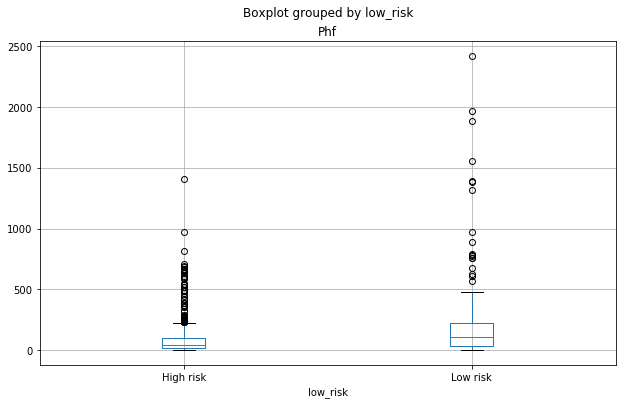

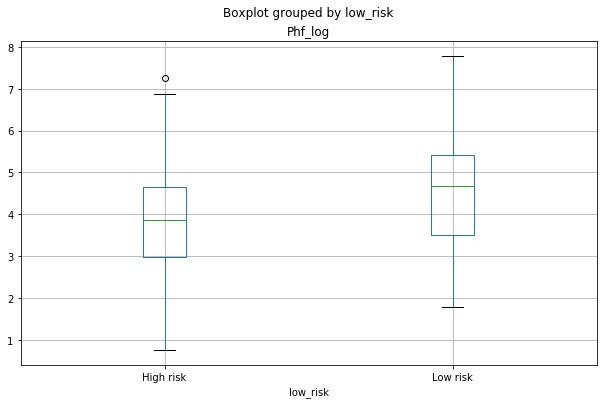

In [34]:
#boxplot for Phf, and the corresponding log

df.boxplot('Phf',by='low_risk',figsize = (10,6))
df.boxplot('Phf_log',by='low_risk',figsize = (10,6))

**Representación lfhf_ratio y lfhf_ratio_log de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

In [35]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de lfhf_ratio correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'lfhf_ratio', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'lfhf_ratio', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'lfhf_ratio', bins = 50)

#Dibujamos el histograma  de la  lfhf_ratio_log correspondiente a los tacogramas de bajo riesgo
df2= df[df['low_risk'] == 1]
df2.hist(column = 'lfhf_ratio_log', bins = 50)

#Dibujamos el histograma  de la  lfhf_ratio_log correspondiente a los tacogramas de alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'lfhf_ratio_log', bins = 50)

#Histograma  lfhf_ratio_log para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'lfhf_ratio_log', bins = 50)
"""

"#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1\ndf2 = df[df['low_risk'] == 1]\n\n#Dibujamos el histograma  de lfhf_ratio correspondiente a los tacogramas de bajo riesgo\ndf2.hist(column = 'lfhf_ratio', bins = 50)\n\n#Realizamos lo mismo pero para los correspondientes a alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'lfhf_ratio', bins = 50)\n\n#Histograma para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_risk'].isna()]\ndf2.hist(column = 'lfhf_ratio', bins = 50)\n\n#Dibujamos el histograma  de la  lfhf_ratio_log correspondiente a los tacogramas de bajo riesgo\ndf2= df[df['low_risk'] == 1]\ndf2.hist(column = 'lfhf_ratio_log', bins = 50)\n\n#Dibujamos el histograma  de la  lfhf_ratio_log correspondiente a los tacogramas de alto riesgo\ndf2= df[df['low_risk'] == 0]\ndf2.hist(column = 'lfhf_ratio_log', bins = 50)\n\n#Histograma  lfhf_ratio_log para los que no pertenecen ni a bajo ni a alto riesgo\ndf2= df[df['low_r

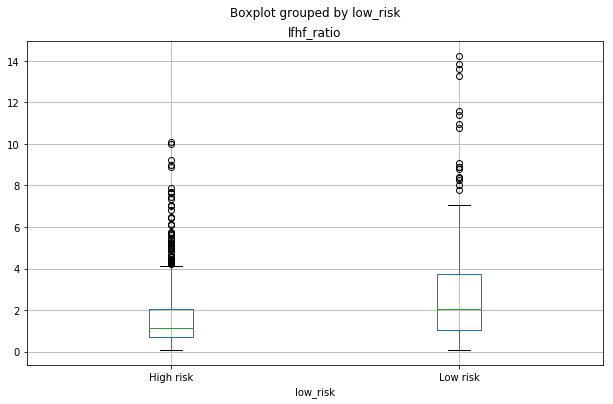

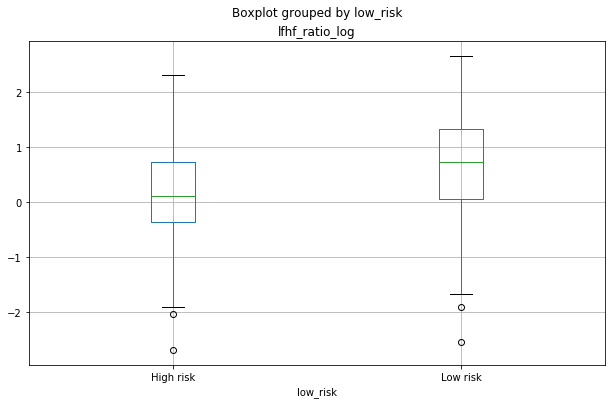

In [36]:
#boxplot for Phf, and the corresponding log
df.boxplot('lfhf_ratio',by='low_risk',figsize = (10,6))
df.boxplot('lfhf_ratio_log',by='low_risk',figsize = (10,6))

**Representación scl de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

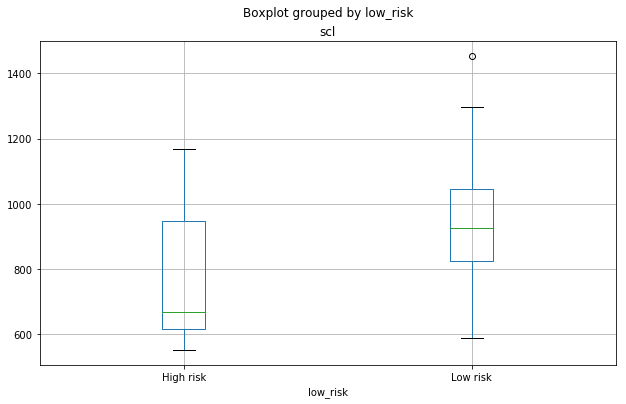

In [37]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de scl correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'scl', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'scl', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'scl', bins = 50)
"""

df.boxplot('scl',by='low_risk',figsize = (10,6))

**Representación ci de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

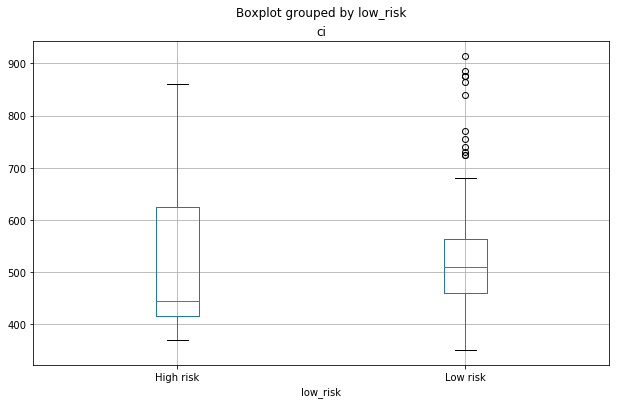

In [38]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de  ci correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'ci', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'ci', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'ci', bins = 50)
"""
df.boxplot('ci',by='low_risk',figsize = (10,6))

**Representación cp de los VPC-tachogram de bajo riesgo, alto riesgo y ni uno ni otro**

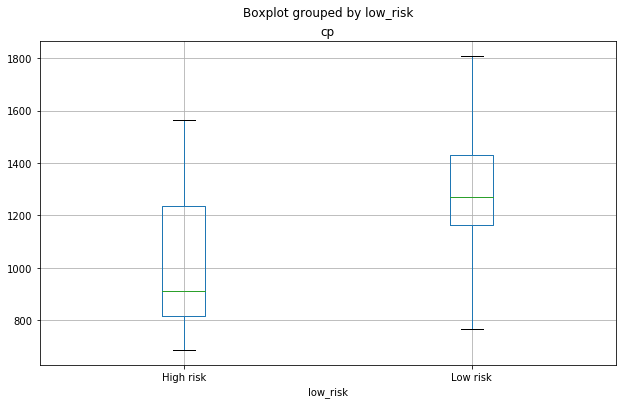

In [39]:
"""#Obtenemos un nuevo Dataframe con los tacogramas de bajo riesgo, es decir, low_risk = 1
df2 = df[df['low_risk'] == 1]

#Dibujamos el histograma  de  cp correspondiente a los tacogramas de bajo riesgo
df2.hist(column = 'cp', bins = 50)

#Realizamos lo mismo pero para los correspondientes a alto riesgo
df2= df[df['low_risk'] == 0]
df2.hist(column = 'cp', bins = 50)

#Histograma para los que no pertenecen ni a bajo ni a alto riesgo
df2= df[df['low_risk'].isna()]
df2.hist(column = 'cp', bins = 50)
"""
df.boxplot('cp',by='low_risk',figsize = (10,6))

#  **Relación de to y ts con el resto de variables**

## Reflexiones

En primer lugar, vamos a intentar representar con respecto a $ts$, con este parámetro es con el que suelen salir las cosas con más significado. He representado todos los puntos, y les he puesto color distinto a los que son de bajo riesgo de los que son de alto riesgo, luego los vamos a analizar por separado, porque queda claro que existe una relación, que seguro que podemos medir con una regresión lineal, pero que la recta que vamos a poder dibujar es diferente, dependiendo de si es de bajo riesgo o de alto riesgo. También está claro que si hacemos la representación frente a la variable con log parece que tenemos mejor representación.

## TO DO 
Repetir los scatter plot para todas las demás variables. Cuando tengas esto, le echamos un vistazo y vemos que análisis estadísticos podemos hacer, yo creo que unas cuantas regresiones lineleas separando por low-risk y high-risk, van a salir significativas. Con eso ya estaría toda la parte del análisis :)

Un saludo

**to y Ptot / to y Ptot_log**

Aquí lo que deberíamos utilizar es una representación de [scatter-plot](https://en.wikipedia.org/wiki/Scatter_plot)

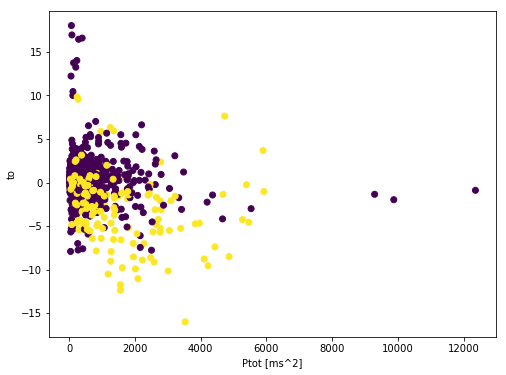

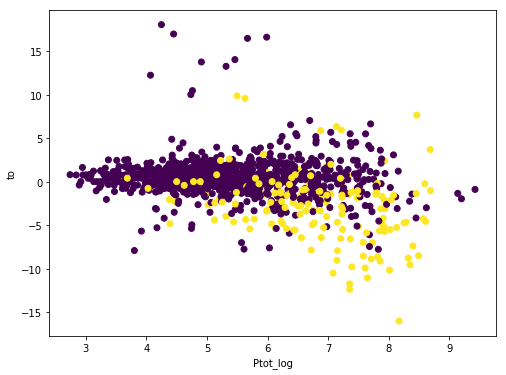

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Ptot'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Ptot [ms^2]')
plt.ylabel('to')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Ptot_log'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Ptot_log')
plt.ylabel('to')

**to y Plf / to y Plf_log**

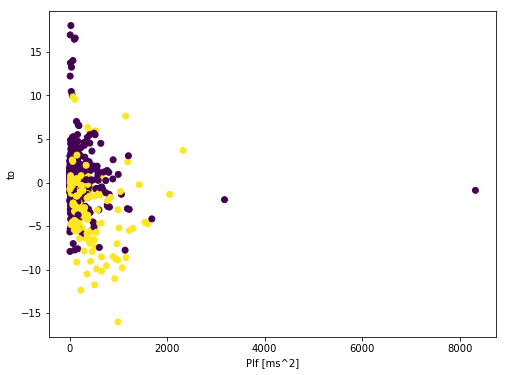

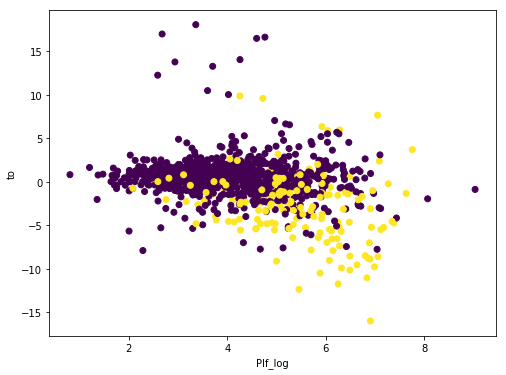

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Plf'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Plf [ms^2]')
plt.ylabel('to')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Plf_log'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Plf_log')
plt.ylabel('to')

**to y Pvlf / to y Pvlf_log**

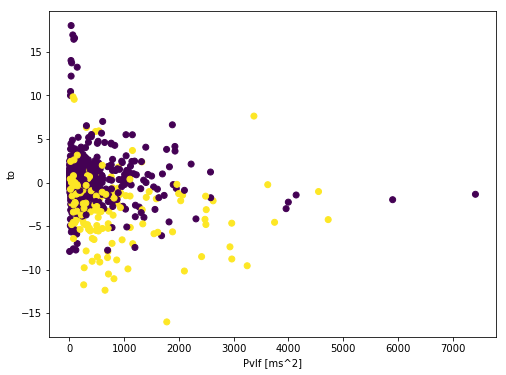

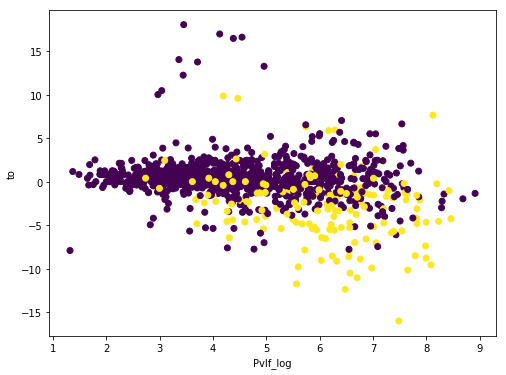

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Pvlf'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Pvlf [ms^2]')
plt.ylabel('to')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Pvlf_log'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Pvlf_log')
plt.ylabel('to')

**to y Phf / to y Phf_log**

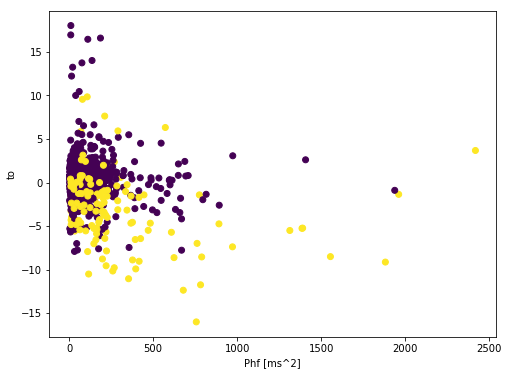

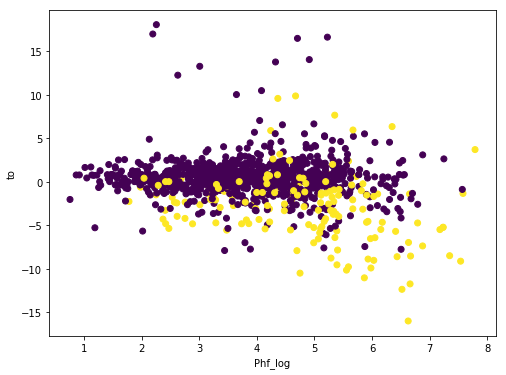

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Phf'],y = df['to'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('Phf [ms^2]')
plt.ylabel('to')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Phf_log'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Phf_log')
plt.ylabel('to')

**to y lfhf_ratio / to y lfhf_ratio_log**

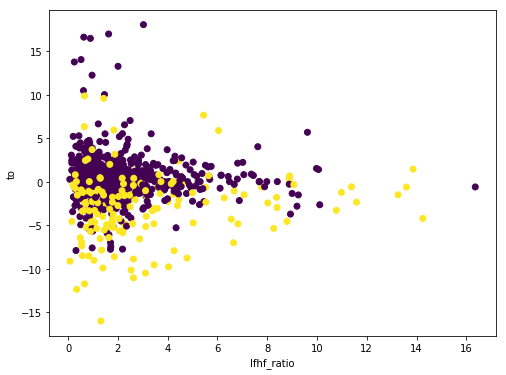

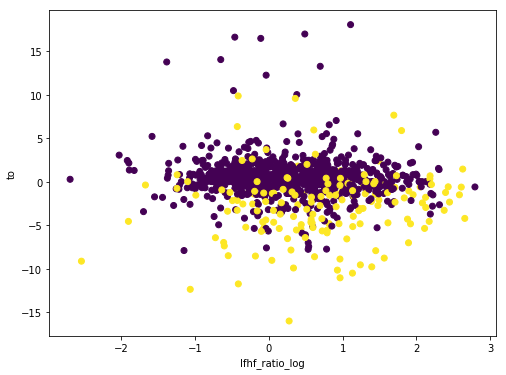

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['lfhf_ratio'],y = df['to'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('lfhf_ratio')
plt.ylabel('to')
plt.figure(figsize = (8,6))
plt.scatter(x = df['lfhf_ratio_log'],y = df['to'],c = df['low_risk'] == 'Low risk')
plt.xlabel('lfhf_ratio_log')
plt.ylabel('to')

**to y scl**

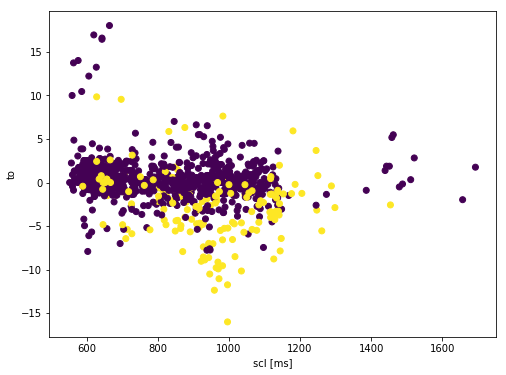

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['scl'],y = df['to'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('scl [ms]')
plt.ylabel('to')


**to y ci**

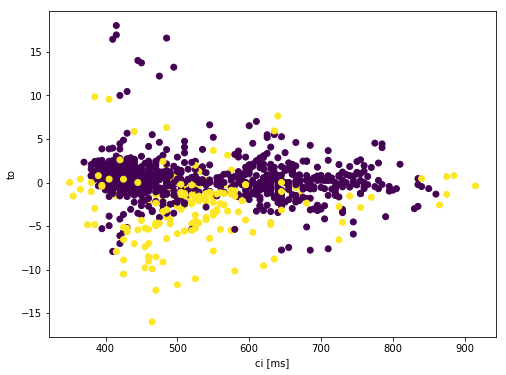

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['ci'],y = df['to'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('ci [ms]')
plt.ylabel('to')


**to y cp**

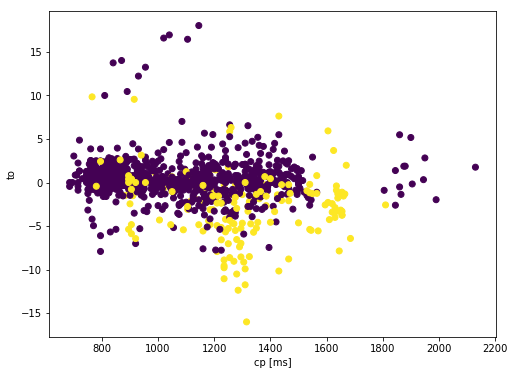

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['cp'],y = df['to'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('cp [ms]')
plt.ylabel('to')


**ts y Ptot / ts y Ptot_log**

Aquí lo que deberíamos utilizar es una representación de [scatter-plot](https://en.wikipedia.org/wiki/Scatter_plot)

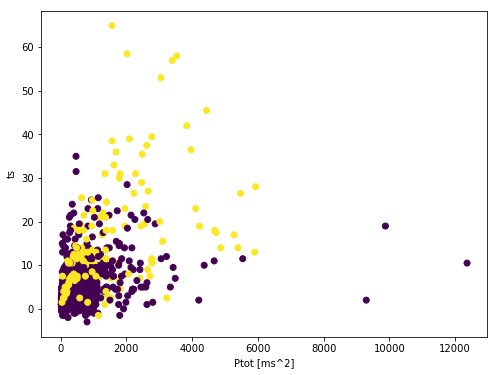

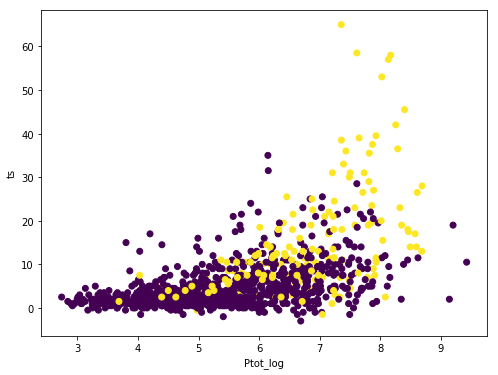

In [48]:
import matplotlib.pyplot as plt

#df.sort_values(by = ['Ptot'], ascending = True)
#df.plot.scatter(x='Ptot',y='ts',c= (df['low_risk'] == 'Low risk'),colormap = 'spring',figsize = (10,6))
#df.plot.scatter(x='Ptot_log',y='ts',c= (df['low_risk'] == 'Low risk'),colormap = 'spring',figsize = (10,6))

plt.figure(figsize = (8,6))
plt.scatter(x = df['Ptot'],y = df['ts'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('Ptot [ms^2]')
plt.ylabel('ts')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Ptot_log'],y = df['ts'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Ptot_log')
plt.ylabel('ts')

**ts y Pvlf / ts y Pvlf_log**

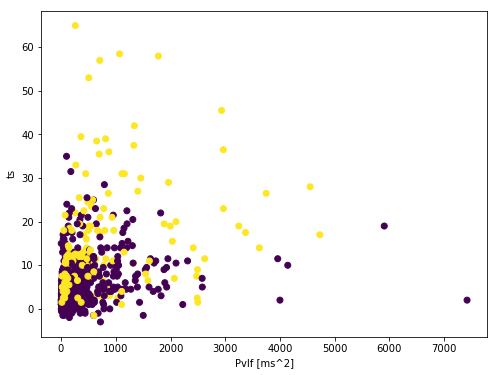

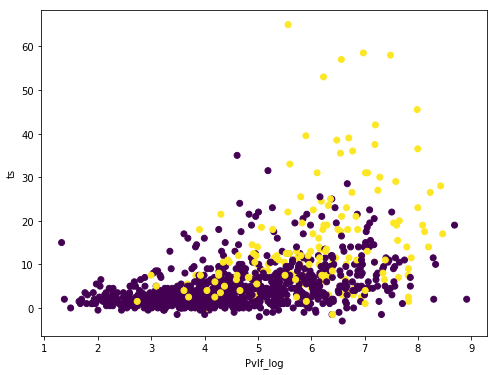

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Pvlf'],y = df['ts'], c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('Pvlf [ms^2]')
plt.ylabel('ts')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Pvlf_log'],y = df['ts'], c = df['low_risk'] == 'Low risk')
plt.xlabel('Pvlf_log')
plt.ylabel('ts')

**ts y Plf / ts y Plf_log**

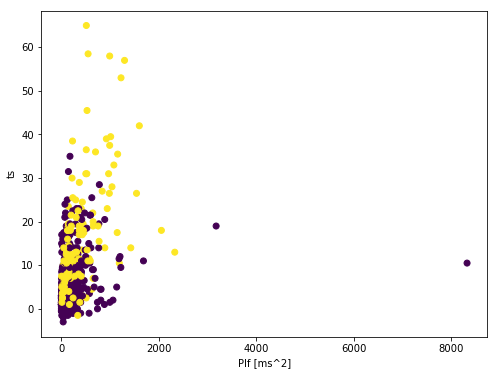

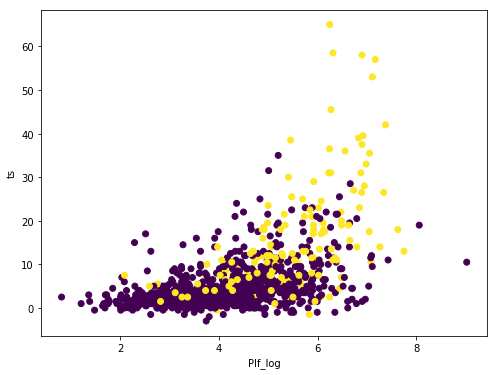

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Plf'],y = df['ts'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('Plf [ms^2]')
plt.ylabel('ts')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Plf_log'],y = df['ts'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Plf_log')
plt.ylabel('ts')

**ts y Phf / ts y Phf_log**

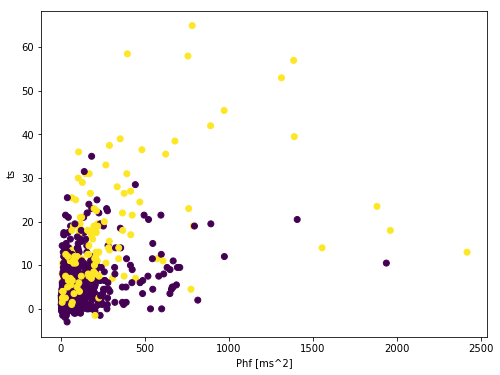

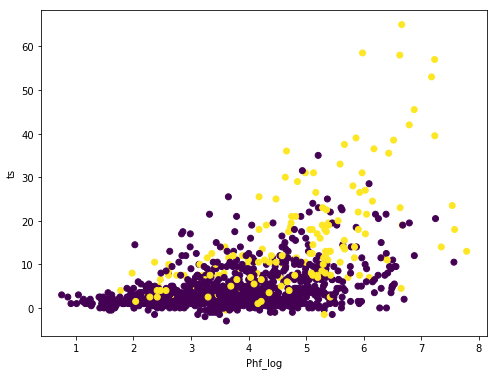

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['Phf'],y = df['ts'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('Phf [ms^2]')
plt.ylabel('ts')
plt.figure(figsize = (8,6))
plt.scatter(x = df['Phf_log'],y = df['ts'],c = df['low_risk'] == 'Low risk')
plt.xlabel('Phf_log')
plt.ylabel('ts')

**ts y lfhf_ratio / ts y lfhf_ratio_log**

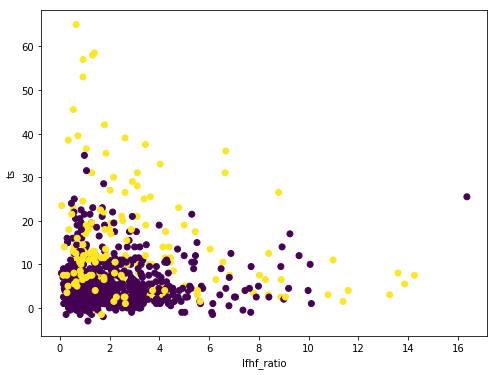

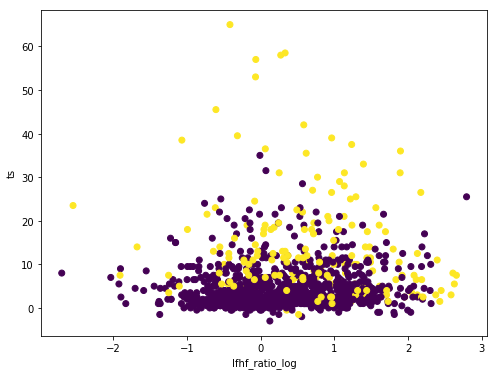

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['lfhf_ratio'],y = df['ts'],c = df['low_risk'] == 'Low risk')
plt.xlabel('lfhf_ratio')
plt.ylabel('ts')
plt.figure(figsize = (8,6))
plt.scatter(x = df['lfhf_ratio_log'],y = df['ts'],c = df['low_risk'] == 'Low risk')
plt.xlabel('lfhf_ratio_log')
plt.ylabel('ts')

**ts y scl**

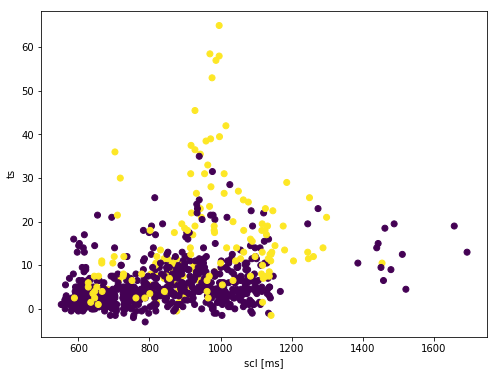

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['scl'],y = df['ts'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('scl [ms]')
plt.ylabel('ts')


**ts y ci**

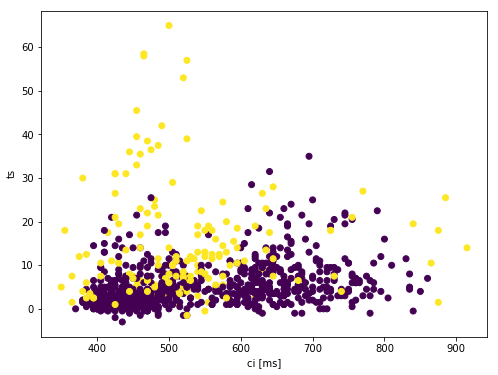

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['ci'],y = df['ts'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('ci [ms]')
plt.ylabel('ts')


**ts y cp**

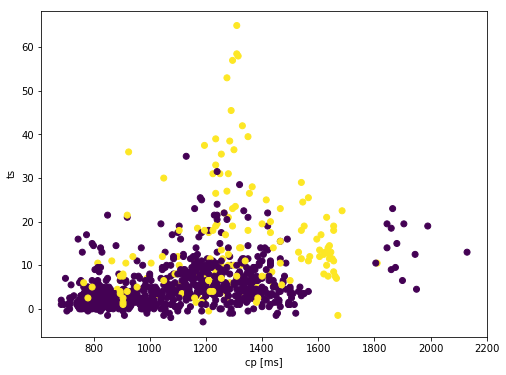

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(x = df['cp'],y = df['ts'],c = df['low_risk'] == 'Low risk')
#plt.legend()
plt.xlabel('cp [ms]')
plt.ylabel('ts')


## Análisis de regresión lineal

Vamos a realizar el análisis de [regresión lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal). También te pediría que le echases un vistazo al capítulo 3 de [ISLR](https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), sobre todo el apartado 3.1. 

En primer lugar lo que vamos a hacer es separar los dataframes en dos dataframes, uno para low-risk y otro para high-risk, y luego realizar el análisis de regresión linea por separado.

In [56]:
df_lowrisk = df[df['low_risk'] == 'Low risk']

df_lowrisk.head()

,id,Ptot,Pulf,Pvlf,Plf,Phf,lfhf_ratio,scl,ci,cp,to,ts,to_average,ts_average,Plf_log,Ptot_log,Pvlf_log,Phf_log,lfhf_ratio_log,low_risk
0,1,1146.746674,0.0,372.167222,329.514015,445.065438,0.740372,1045.0,670.0,1425.0,-1.418440,7.0,-3.488372,15.250000,5.797619,7.044684,5.919343,6.098221,-0.300602,Low risk
1,1,1390.984932,0.0,486.596715,434.261708,470.126509,0.923712,1078.0,575.0,1545.0,-5.491991,24.5,-3.488372,15.250000,6.073647,7.237767,6.187436,6.153002,-0.079354,Low risk
2,2,1406.653670,0.0,884.931026,441.773174,79.949470,5.525655,766.0,485.0,1020.0,-0.653595,3.0,-0.653595,3.000000,6.090797,7.248969,6.785510,4.381395,1.709402,Low risk
3,3,329.135673,0.0,220.803095,84.774475,23.558104,3.598527,877.0,665.0,1100.0,-0.571429,5.5,-1.334365,3.306452,4.439994,5.796470,5.397271,3.159470,1.280525,Low risk
4,3,488.136692,0.0,327.904546,60.713874,99.518272,0.610078,925.0,540.0,1325.0,-2.179837,10.0,-1.334365,3.306452,4.106172,6.190595,5.792723,4.600341,-0.494169,Low risk


In [57]:
df_highrisk = df[df['low_risk'] == 'High risk']
df_highrisk.head()

,id,Ptot,Pulf,Pvlf,Plf,Phf,lfhf_ratio,scl,ci,cp,to,ts,to_average,ts_average,Plf_log,Ptot_log,Pvlf_log,Phf_log,lfhf_ratio_log,low_risk
163,14,32.050413,0.0,21.554182,6.882229,3.614002,1.904324,603.0,425.0,780.0,-0.413223,1.0,0.742791,0.276618,1.928943,3.467310,3.070570,1.284816,0.644127,High risk
164,14,63.100382,0.0,26.216622,14.207382,22.676378,0.626528,614.0,420.0,805.0,0.000000,1.0,0.742791,0.276618,2.653762,4.144727,3.266394,3.121324,-0.467562,High risk
165,14,79.349160,0.0,41.075355,16.391741,21.882064,0.749095,606.0,425.0,770.0,0.000000,1.5,0.742791,0.276618,2.796778,4.373858,3.715408,3.085667,-0.288890,High risk
166,14,81.018208,0.0,66.422658,9.945124,4.650426,2.138541,584.0,405.0,765.0,1.709402,0.5,0.742791,0.276618,2.297082,4.394674,4.196038,1.536959,0.760124,High risk
167,14,55.315139,0.0,35.131653,17.137678,3.045808,5.626645,595.0,405.0,780.0,1.680672,1.5,0.742791,0.276618,2.841279,4.013047,3.559103,1.113766,1.727513,High risk


#### Regresión lineal entre Ptot_log y ts

In [58]:
import numpy as np
import statsmodels.api as sm


print('Lower Risk: Ptot_log vs TS')
#low_risk
X_ptot_l = df_lowrisk['Ptot_log']
ts_l = df_lowrisk['ts']

#add intercept
X_ptot_l = sm.add_constant(X_ptot_l)

#fit and summary
model_l = sm.OLS(ts_l, X_ptot_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('Lower Risk: Ptot_log vs TS')
#high risk
X_ptot_h = df_highrisk['Ptot_log']
ts_h = df_highrisk['ts']

#add intercept
X_ptot_h = sm.add_constant(X_ptot_h)

#fit and summary
model_h = sm.OLS(ts_h, X_ptot_h)
results_h = model_h.fit()
print(results_h.summary())

/Users/obarquero/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Lower Risk: Ptot_log vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     71.77
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           1.04e-14
Time:                        09:40:12   Log-Likelihood:                -652.28
No. Observations:                 174   AIC:                             1309.
Df Residuals:                     172   BIC:                             1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.9326    

### Interpretación de los resultados


Vamos a realizar una interpretación rápida de los resultados del análisis de regresión:

BAJO RIESGO:

* 1.- En primer lugar tenemos que verificar si el modelo de regresión lineal en su conjunto es estadísticamente significativo o no. Para ello vamos a donde se indica Prob(F-statistic), si esta probabilidad es menor que 0.05, entonces podemos decir que el modelo es significativo.
* 2.- El R-squared nos dice el porcentaje de la varianza de la variable y (TS) que somos capaces de explicar con la variable Ptot_log. Como vemos no es mucho, apporx un 30%, pero tampoco es bajo.
* 3.- Una vez visto el modelo en su conjunto vamos a ver si cada una de las variables del modelo son significativamente diferentes de cero. En el caso de modelos de regresión simple sólo tenemos una variable, en este caso el coeficiente que acompaña a la variable Ptot_log. También tenemos el intercept, que es la ordenada en el origen. Para ver si son diferente de cero, vamos a analizar el valor de P >|t|, si esta probabilidad es menor que 0.05, entonces podemos decir que el coeficiente que multiplica a la variable es significativamente diferente de 0, y por lo tanto que la variable en cuestión aporta al modelo. Como ocurre en este caso.
* 4.- Luego vamos a ver el valor del coeficiente, que en este caso es 6.26. Lo que nos dice es que cuando aumenta Ptot_log, aumenta TS y además por cada unidad que aumente, aumenta 6.26 TS (ojo Ptot está en unidades logarítmicas).

ALTO RIESGO:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 21.4 %, correspondiente al porcentaje de TS que podemos explicar con la variable Ptot_log. Este porcentaje es de un valor intermedio ya que no es significativamente grande.
* 3.- Dado que P > | t | es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta Ptot_log, TS aumenta 1.75

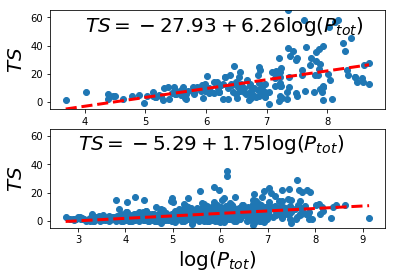

In [59]:
#plot
#from matplotlib import rc
#import matplotlib.pyplot as plt


#rc('text', usetex=True)

plt.subplot(2,1,1)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#low-risk
plt.scatter(df_lowrisk['Ptot_log'],df_lowrisk['ts'])
plt.xlabel('$\log{(P_{tot})}$',fontsize = 20)
plt.ylabel('$TS$',fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['Ptot_log']),np.max(df_lowrisk['Ptot_log']),100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1],yy,'r--',linewidth = 3)
plt.ylim(-5,65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{tot}})$' % (results_l.params[0],results_l.params[1]), fontsize=20)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#high-risk
plt.subplot(2,1,2)

plt.scatter(df_highrisk['Ptot_log'],df_highrisk['ts'])
plt.xlabel('$\log{(P_{tot})}$',fontsize = 20)
plt.ylabel('$TS$',fontsize = 20)

xx = np.linspace(np.min(df_highrisk['Ptot_log']),np.max(df_highrisk['Ptot_log']),100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1],yy,'r--',linewidth = 3)
plt.ylim(-5,65)
#text with linear regresion
s = '$TS = {} + $'
plt.text(3, 50, r'$TS = %.2f + %.2f \log({P_{tot}})$' % (results_h.params[0],results_h.params[1]), fontsize=20)

#### Regresión lineal entre Pvlf_log y ts

In [60]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: Pvlf_log vs TS')

#low_risk
X_pvlf_l = df_lowrisk['Pvlf_log']
ts_l = df_lowrisk['ts']

#add intercept
X_pvlf_l = sm.add_constant(X_pvlf_l)

#fit and summary
model_l = sm.OLS(ts_l, X_pvlf_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: Pvlf_log vs TS')

#high_risk
X_pvlf_h = df_highrisk['Pvlf_log']
ts_h = df_highrisk['ts']

#add intercept
X_pvlf_h = sm.add_constant(X_pvlf_h)

#fit and summary
model_h = sm.OLS(ts_h, X_pvlf_h)
results_h = model_h.fit()
print(results_h.summary())


Lower Risk: Pvlf_log vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     27.43
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           4.70e-07
Time:                        09:40:13   Log-Likelihood:                -669.74
No. Observations:                 174   AIC:                             1343.
Df Residuals:                     172   BIC:                             1350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5354    

### Interpretación de los resultados



BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de Pvlf_log y ts para bajo riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 13.8 %, correspondiente al porcentaje de TS que podemos explicar con la variable Pvlf_log. Este porcentaje es de un valor bajo.
* 3.- Dado que P > | t | es ligeramente superior a 0.05 podemos determinar que la variable aporta al modelo ya que no dista mucho de 0.05.
* 4.- Por cada unidad que aumenta Pvlf_log, TS aumenta 3.77.

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de Pvlf_log y ts para alto riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es un 20 %, correspondiente al porcentaje de TS que podemos explicar con la variable Pvlf_log. Este porcentaje es de un valor bajo.
* 3.- Dado que P > | t | es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta Pvlf_log, TS aumenta 1.42

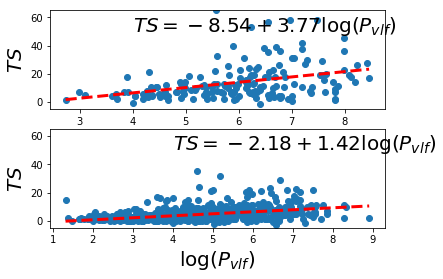

In [61]:
#plot Pvlf_log y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['Pvlf_log'], df_lowrisk['ts'])
plt.xlabel('$\log{(P_{vlf})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['Pvlf_log']), np.max(df_lowrisk['Pvlf_log']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--',linewidth = 3)
plt.ylim(-5, 65)
#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{vlf}})$' % (results_l.params[0], results_l.params[1]), fontsize = 20)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot Pvlf_log y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['Pvlf_log'], df_highrisk['ts'])
plt.xlabel('$\log{(P_{vlf})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['Pvlf_log']), np.max(df_highrisk['Pvlf_log']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{vlf}})$' % (results_h.params[0], results_h.params[1]), fontsize = 20)


#### Regresión lineal entre Plf_log y ts

In [62]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: Plf_log vs TS')

#low_risk
X_plf_l = df_lowrisk['Plf_log']
ts_l = df_lowrisk['ts']

#add intercept
X_plf_l = sm.add_constant(X_plf_l)

#fit and summary
model_l = sm.OLS(ts_l, X_plf_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: Plf_log vs TS')

#high_risk
X_plf_h = df_highrisk['Plf_log']
ts_h = df_highrisk['ts']

#add intercept
X_plf_h = sm.add_constant(X_plf_h)

#fit and summary
model_h = sm.OLS(ts_h, X_plf_h)
results_h = model_h.fit()
print(results_h.summary())


Lower Risk: Plf_log vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     93.54
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           6.11e-18
Time:                        09:40:14   Log-Likelihood:                -644.84
No. Observations:                 174   AIC:                             1294.
Df Residuals:                     172   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.6431     

### Interpretación de los resultados


BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de Plf_log y ts para bajo riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es un 35.2 %, correspondiente al porcentaje de TS que podemos explicar con la variable Plf_log. Este porcentaje no es muy elevado pero tampoco es bajo.
* 3.- Dado que P > | t | es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta Plf_log, TS aumenta 6.55

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de Plf_log y ts para alto riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 19.2 %, correspondiente al porcentaje de TS que podemos explicar con la variable Plf_log. Este porcentaje es bajo.
* 3.- Dado que P < | t | es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta Plf_log, TS aumenta 1.72

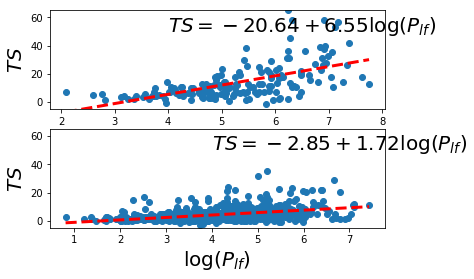

In [63]:
#plot Plf_log y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['Plf_log'], df_lowrisk['ts'])
plt.xlabel('$\log{(P_{lf})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['Plf_log']), np.max(df_lowrisk['Plf_log']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{lf}})$' % (results_l.params[0], results_l.params[1]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot Plf_log y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['Plf_log'], df_highrisk['ts'])
plt.xlabel('$\log{(P_{lf})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['Plf_log']), np.max(df_highrisk['Plf_log']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{lf}})$' % (results_h.params[0], results_h.params[1]), fontsize = 20)



#### Regresión lineal entre Phf_log y ts

In [64]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: Phf_log vs TS')

#low_risk
X_phf_l = df_lowrisk['Phf_log']
ts_l = df_lowrisk['ts']

#add intercept
X_phf_l = sm.add_constant(X_phf_l)

#fit and summary
model_l = sm.OLS(ts_l, X_phf_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: Phf_log vs TS')

#high_risk
X_phf_h = df_highrisk['Phf_log']
ts_h = df_highrisk['ts']

#add intercept
X_phf_h = sm.add_constant(X_phf_h)

#fit and summary
model_h = sm.OLS(ts_h, X_phf_h)
results_h = model_h.fit()
print(results_h.summary())

Lower Risk: Phf_log vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     108.0
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           6.09e-20
Time:                        09:40:14   Log-Likelihood:                -640.22
No. Observations:                 174   AIC:                             1284.
Df Residuals:                     172   BIC:                             1291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7424     

### Interpretación de los resultados


BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de Phf_log y ts para bajo riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 38.6 %, correspondiente al porcentaje de TS que podemos explicar con la variable Phf_log. Este porcentaje es no es muy elevado pero tampoco es bajo.
* 3.- Dado que P > |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta Phf_log, TS aumenta 5.6

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de Phf_log y ts para alto riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es un 14 %, correspondiente al porcentaje de TS que podemos explicar con la variable Phf_log. Este porcentaje es de un valor bajo.
* 3.- Dado que P > |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta Phf_log, TS aumenta 1.39

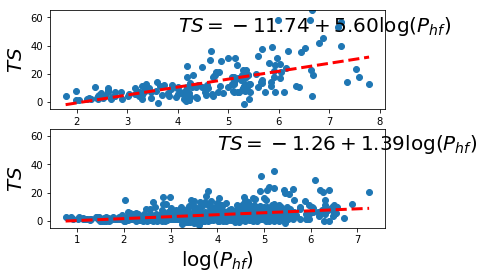

In [65]:
#plot Phf_log y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['Phf_log'], df_lowrisk['ts'])
plt.xlabel('$\log{(P_{hf})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['Phf_log']), np.max(df_lowrisk['Phf_log']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{hf}})$' % (results_l.params[0], results_l.params[1]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot Phf_log y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['Phf_log'], df_highrisk['ts'])
plt.xlabel('$\log{(P_{hf})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['Phf_log']), np.max(df_highrisk['Phf_log']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({P_{hf}})$' % (results_h.params[0], results_h.params[1]), fontsize = 20)

#### Regresión lineal entre lfhf_ratio_log y ts

In [66]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: lfhf_ratio_log vs TS')

#low_risk
X_lfhf_ratio_l = df_lowrisk['lfhf_ratio_log']
ts_l = df_lowrisk['ts']

#add intercept
X_lfhf_ratio_l = sm.add_constant(X_lfhf_ratio_l)

#fit and summary
model_l = sm.OLS(ts_l, X_lfhf_ratio_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: lfhf_ratio_log vs TS')

#high_risk
X_lfhf_ratio_h = df_highrisk['lfhf_ratio_log']
ts_h = df_highrisk['ts']

#add intercept
X_lfhf_ratio_h = sm.add_constant(X_lfhf_ratio_h)

#fit and summary
model_h = sm.OLS(ts_h, X_lfhf_ratio_h)
results_h = model_h.fit()
print(results_h.summary())

Lower Risk: lfhf_ratio_log vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     6.725
Date:                Thu, 23 Aug 2018   Prob (F-statistic):             0.0103
Time:                        09:40:15   Log-Likelihood:                -679.28
No. Observations:                 174   AIC:                             1363.
Df Residuals:                     172   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const      

### Interpretación de los resultados


BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de lfhf_ratio_log y ts para bajo riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 3.8 %, correspondiente al porcentaje de TS que podemos explicar con la variablelfhf_ratio_log. Este porcentaje es de un muy bajo.
* 3.- Dado que P > |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta lfhf_ratio_log, TS dismimuye 2.51

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de lfhf_ratio_log y ts para alto riesgo:

* 1.- Al ser Prob(F-static) > 0.05 podemos determinar que el modelo de regresión lineal en su conjunto no es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 0.4 %, correspondiente al porcentaje de TS que podemos explicar con la variable lfhf_ratio. Este porcentaje es de un valor muy bajo.
* 3.- Dado que P > |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta lfhf_ratio_log, TS aumenta 0.34

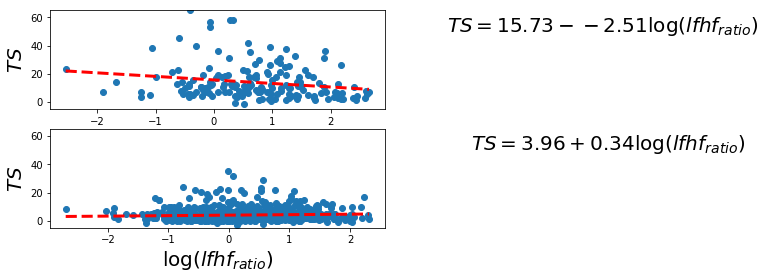

In [67]:
#plot lfhf_ratio_log y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['lfhf_ratio_log'], df_lowrisk['ts'])
plt.xlabel('$\log{(lfhf_{ratio})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['lfhf_ratio_log']), np.max(df_lowrisk['lfhf_ratio_log']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f - %.2f \log({lfhf_{ratio}})$' % (results_l.params[0], results_l.params[1]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot lfhf_ratio_log y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['lfhf_ratio_log'], df_highrisk['ts'])
plt.xlabel('$\log{(lfhf_{ratio})}$', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['lfhf_ratio_log']), np.max(df_highrisk['lfhf_ratio_log']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f \log({lfhf_{ratio}})$' % (results_h.params[0], results_h.params[1]), fontsize = 20)

#### Regresión lineal entre scl y ts

In [68]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: scl vs TS')

#low_risk
X_scl_l = df_lowrisk['scl']
ts_l = df_lowrisk['ts']

#add intercept
X_scl_l = sm.add_constant(X_scl_l)

#fit and summary
model_l = sm.OLS(ts_l, X_scl_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: scl vs TS')

#high_risk
X_scl_h = df_highrisk['scl']
ts_h = df_highrisk['ts']

#add intercept
X_scl_h = sm.add_constant(X_scl_h)

#fit and summary
model_h = sm.OLS(ts_h, X_scl_h)
results_h = model_h.fit()
print(results_h.summary())

Lower Risk: scl vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     13.11
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           0.000387
Time:                        09:40:15   Log-Likelihood:                -676.23
No. Observations:                 174   AIC:                             1356.
Df Residuals:                     172   BIC:                             1363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5381      5.1

### Interpretación de los resultados


BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de scl y ts para bajo riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 7.1 %, correspondiente al porcentaje de TS que podemos explicar con la variable scl. Este porcentaje es de un valor muy bajo.
* 3.- Dado que P < |t| es mayor a 0.05 podemos determinar que la variable no aporta al modelo
* 4.- Por cada unidad que aumenta scl, TS aumenta 0.02

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de scl y ts para alto riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 19.3 %, correspondiente al porcentaje de TS que podemos explicar con la variable scl. Este porcentaje es de un valor bajo.
* 3.- Dado que P < |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta scl, TS aumenta 0.01

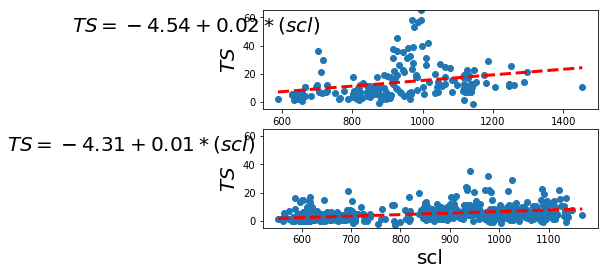

In [69]:
#plot scl y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['scl'], df_lowrisk['ts'])
plt.xlabel('scl', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['scl']), np.max(df_lowrisk['scl']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f * (scl)$' % (results_l.params[0], results_l.params[1]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot scl y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['scl'], df_highrisk['ts'])
plt.xlabel('scl', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['scl']), np.max(df_highrisk['scl']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f  * (scl)$' % (results_h.params[0], results_h.params[1]), fontsize = 20)

#### Regresión lineal entre ci y ts

In [70]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: ci vs TS')

#low_risk
X_ci_l = df_lowrisk['ci']
ts_l = df_lowrisk['ts']

#add intercept
X_ci_l = sm.add_constant(X_ci_l)

#fit and summary
model_l = sm.OLS(ts_l, X_ci_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: ci vs TS')

#high_risk
X_ci_h = df_highrisk['ci']
ts_h = df_highrisk['ts']

#add intercept
X_ci_h = sm.add_constant(X_ci_h)

#fit and summary
model_h = sm.OLS(ts_h, X_ci_h)
results_h = model_h.fit()
print(results_h.summary())

Lower Risk: ci vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.002509
Date:                Thu, 23 Aug 2018   Prob (F-statistic):              0.960
Time:                        09:40:16   Log-Likelihood:                -682.62
No. Observations:                 174   AIC:                             1369.
Df Residuals:                     172   BIC:                             1376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2161      4.80

### Interpretación de los resultados


BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de ci y ts para bajo riesgo:

* 1.- Al ser Prob(F-static) > 0.05 podemos determinar que el modelo de regresión lineal en su conjunto no es estadísticamente significativo.
* 2.- R-squared es 0 %, por lo tanto, el modelo no está ajustado.

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de ci y ts para alto riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión linea altol en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 21.3 %, correspondiente al porcentaje de TS que podemos explicar con la variable ci. Este porcentaje es de un valor bajo.
* 3.- Dado que P < |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta ci, TS aumenta 0.02

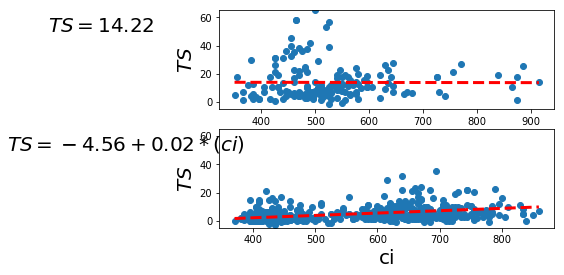

In [71]:
#plot ci y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['ci'], df_lowrisk['ts'])
plt.xlabel('ci', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['ci']), np.max(df_lowrisk['ci']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f $' % (results_l.params[0]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot ci y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['ci'], df_highrisk['ts'])
plt.xlabel('ci', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['ci']), np.max(df_highrisk['ci']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f  * (ci)$' % (results_h.params[0], results_h.params[1]), fontsize = 20)

#### Regresión lineal entre cp y ts

In [72]:
import numpy as np
import statsmodels.api as sm

print('Lower Risk: cp vs TS')

#low_risk
X_cp_l = df_lowrisk['cp']
ts_l = df_lowrisk['ts']

#add intercept
X_cp_l = sm.add_constant(X_cp_l)

#fit and summary
model_l = sm.OLS(ts_l, X_cp_l)
results_l = model_l.fit()
print(results_l.summary())

print("#########################################################################################################")
print('High Risk: cp vs TS')

#high_risk
X_cp_h = df_highrisk['cp']
ts_h = df_highrisk['ts']

#add intercept
X_cp_h = sm.add_constant(X_cp_h)

#fit and summary
model_h = sm.OLS(ts_h, X_cp_h)
results_h = model_h.fit()
print(results_h.summary())

Lower Risk: cp vs TS
                            OLS Regression Results                            
Dep. Variable:                     ts   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.839
Date:                Thu, 23 Aug 2018   Prob (F-statistic):             0.0292
Time:                        09:40:16   Log-Likelihood:                -680.20
No. Observations:                 174   AIC:                             1364.
Df Residuals:                     172   BIC:                             1371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7090      5.20

### Interpretación de los resultados


BAJO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de cp y ts para bajo riesgo:

1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
2.- R-squared es aproximadamente un 2.7 %, correspondiente al porcentaje de TS que podemos explicar con la variable cp. Este porcentaje es de un valor muy bajo.
3.- Dado que P < |t| es mayor a 0.05 podemos determinar que la variable no aporta al modelo
4.- Por cada unidad que aumenta cp, TS aumenta 0.01

ALTO RIESGO:

Interpretación rápida de los resultados del análisis de regresión de cp y ts para alto riesgo:

* 1.- Al ser Prob(F-static) < 0.05 podemos determinar que el modelo de regresión lineal en su conjunto es estadísticamente significativo.
* 2.- R-squared es aproximadamente un 16 %, correspondiente al porcentaje de TS que podemos explicar con la variable cp. Este porcentaje es de un valor bajo.
* 3.- Dado que P < |t| es menor a 0.05 podemos determinar que la variable aporta al modelo
* 4.- Por cada unidad que aumenta cp, TS aumenta 0.01

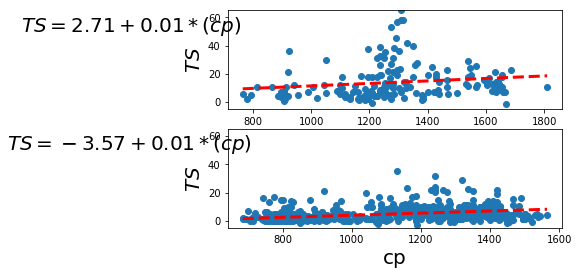

In [73]:
#plot cp y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['cp'], df_lowrisk['ts'])
plt.xlabel('cp', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['cp']), np.max(df_lowrisk['cp']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f * (cp)$' % (results_l.params[0], results_l.params[1]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot cp y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['cp'], df_highrisk['ts'])
plt.xlabel('cp', fontsize = 20)
plt.ylabel('$TS$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['cp']), np.max(df_highrisk['cp']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-5, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$TS = %.2f + %.2f  * (cp)$' % (results_h.params[0], results_h.params[1]), fontsize = 20)

### Resumen comparación low risk y high risk

Es de especial interés conocer el efecto que produce una variable sobre otra, por ello hemos usado métodos de regresión lineal para poder ver la dependencia entre variables. En concreto, hemos estimado la variable TS, es decir, se ha calculado la recta de regresión de TS sobre cada una de las distintas variables que se están estudiando.

**Potencias**

* En primer lugar, observamos que en todas las variables de potencia el modelo de regresión lineal es estadísticamente significativo, tanto en bajo riesgo como en alto.
* En segundo lugar, vemos que el coeficiente de determinación (proporción de variabilidad de la variable TS que queda expresada con cada una de las otras variables) en nigún caso es muy cercano a 1 (en ese caso el ajuste sería mejor), no obstante los valores pueden ser determinantes:
    * BAJO RIESGO: En el caso de todas las potencias este coeficiente supera el 30 %, excepto para Pvlf. Por lo tanto se puede decir que el ajuste no es malo.
    * ALTO RIESGO: En el caso de todas las potencias este coeficiente se encuentra entre un 14 % y un 22 % aproximadamente, por lo que el ajuste es menor que para bajo riesgo.
* En tercer lugar vemos que en todos los casos la relación que mantienen es directa (Coeficiente de regresión positivo).
* Coeficiente de regresión:
    * BAJO RIESGO: Es mayor que en el caso de alto riesgo, por cada unidad que aumenta la potencia, TS lo hace en mayor medida que si se trata de alto riesgo.
    * ALTO RIESGO: TS aumenta en menor medida que en el caso de bajo riesgo.

**ratio, scl, ci, cp**

Por términos generales no parece que con estas variables salga algo concluyente. Quizás en el caso de alto riesgo, para las variables scl, ci y cp si puede ser que se obtenga algo un poco más significativo.

## Corregir por la SCL

Es bien conocido el hecho de que uno de los factores que más influyen en el valor de respueta de HRT, $TS$ es el ritmo cardíaco en el que se produce el VPC. Por esta razón, uno de los objetivos de mi PhD fue intentar independizar las relaciones de algunas variables del SCL. Hay diferentes formas, yo en la Tesis cree modelos más complejos con términos de interacción. Aquí, podemos intentar hacer algo más sencillo que es crear un modelo de varias dimensiones con SCL, o eliminando la influencia del SCL. Vamos a intentar esto último.

La idea es:

* Creamos un modelo de regresión lineal con TS = w0 + w1*SCL. Cogemos cada estimación de de TS con este modelo y se la restamos al valor real de TS, de esta forma estaremos eliminando del valor de TS real lo que sabemos explicar con SCL.
* Una vez hecho esto, nos queda algo que llamamos residuo. Lo que vamos a hacer es intentar explicar este residuo con las variables que hemos calculado. A ver que sale:

### Corección SCL para potencia total

In [76]:
#%% Primero creamos el modelo para SCL

import numpy as np
import statsmodels.api as sm

print('Lower Risk: scl vs TS')

#low_risk
X_scl_l = df_lowrisk['scl']
ts_l = df_lowrisk['ts']

#add intercept
X_scl_l = sm.add_constant(X_scl_l)

#fit and summary
model_l_scl = sm.OLS(ts_l, X_scl_l)
results_l_scl = model_l.fit()

#obtenemos predicciones para los vlaores de SCL
predictions_l = results_l_scl.predict(X_scl_l)

#obtenemos residuos para lower-risk
res_l = ts_l - predictions_l

#print(results_l.summary())

#print("#########################################################################################################")
#print('High Risk: scl vs TS')

#high_risk
X_scl_h = df_highrisk['scl']
ts_h = df_highrisk['ts']

#add intercept
X_scl_h = sm.add_constant(X_scl_h)

#fit and summary
model_h_scl = sm.OLS(ts_h, X_scl_h)
results_h_scl = model_h.fit()

#obtenemos predicciones para los vlaores de SCL
predictions_h = results_h_scl.predict(X_scl_h)

#obtenemos residuos para lower-risk
res_h = ts_h - predictions_h
#print(results_h.summary())

Lower Risk: scl vs TS


In [88]:
# Creamos modelos sobre los residuos

print('Lower Risk: Ptot vs TS without SCL')
#la variable que ahora queremos estimar es res_l
model_l = sm.OLS(res_l,X_ptot_l)
results_l = model_l.fit()
print(results_l.summary())

#print("#########################################################################################################")
print('High Risk: Ptot vs TS without SCL')
model_h = sm.OLS(res_h,X_ptot_h)
results_h = model_h.fit()
print(results_h.summary())

Lower Risk: Ptot vs TS without SCL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     79.76
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           6.28e-16
Time:                        10:00:03   Log-Likelihood:                -645.12
No. Observations:                 174   AIC:                             1294.
Df Residuals:                     172   BIC:                             1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.

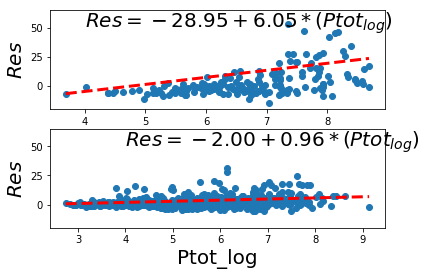

In [89]:
#plot cp y ts low risk

import matplotlib.pyplot as plt

plt.subplot(2,1,1)

plt.scatter(df_lowrisk['Ptot_log'], res_l)
plt.xlabel('Ptot_log', fontsize = 20)
plt.ylabel('$Res$', fontsize = 20)

xx = np.linspace(np.min(df_lowrisk['Ptot_log']), np.max(df_lowrisk['Ptot_log']), 100)
xx = sm.add_constant(xx)
yy = results_l.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-20, 65)

#text with linear regresion
s = '$TS = {} + $'
plt.text(4, 50, r'$Res = %.2f + %.2f * (Ptot_{log})$' % (results_l.params[0], results_l.params[1]), fontsize = 20)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#plot cp y ts high risk

plt.subplot(2,1,2)

plt.scatter(df_highrisk['Ptot_log'], res_h)
plt.xlabel('Ptot_log', fontsize = 20)
plt.ylabel('$Res$', fontsize = 20)

xx = np.linspace(np.min(df_highrisk['Ptot_log']), np.max(df_highrisk['Ptot_log']), 100)
xx = sm.add_constant(xx)
yy = results_h.predict(xx)
plt.plot(xx[:,1], yy, 'r--', linewidth = 3)
plt.ylim(-20, 65)

#text with linear regresion
s = '$Res = {} + $'
plt.text(4, 50, r'$Res = %.2f + %.2f  * (Ptot_{log})$' % (results_h.params[0], results_h.params[1]), fontsize = 20)